In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os

from itertools import chain
from pathlib import *
from math import ceil
from sqlalchemy import create_engine

from helper import *
from tree_weight import *
from time import time
from main import make_graph_from_tree

from typing import List
%matplotlib inline

/home/longdang/WorkStation/University/ResearchProject/main.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


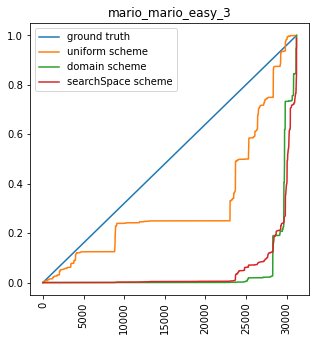

In [12]:
image_folder = 'graphs/'
tree = 'benchmark_models/mario/trees/mario_easy_3.sqlite'
info_df = to_df(tree, 'info').set_index('NodeID')
nodes_df = to_df(tree, 'nodes').set_index('NodeID')

(fig, ax), nodes_df, info_df, cum_sums = \
    make_graph_from_tree(image_folder, tree, 
    schemes=[
       'uniform_scheme', 
       'domain_scheme', 
       'searchSpace_scheme'
    ],
    write_to_sqlite=True)

# if 'NodeWeight' in nodes_df.columns:
#     nodes_df = nodes_df.rename(columns={'NodeWeight': 'UniformNodeWeight'})
#     engine = create_engine('sqlite:///' + tree)
#     write_df = nodes_df.reset_index()
#     write_df.to_sql('Nodes', engine, if_exists='replace', index=False)

In [4]:
# mappings = {}
cands, mappings, par_domain, children_domain = \
            find_split_variable(0, nodes_df, info_df, mappings)

In [11]:
children_domain[1][cands[0]]

{3, 4, 5, 6, 7, 8, 9, 10}

In [4]:
dfs_ordering = nodes_df[~nodes_df['Status'].isin({3})].sort_values('DFSOrdering').index.to_list()
cum_sum = get_cum_weight(nodes_df, 'SearchSpaceNodeWeight', dfs_ordering)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1026    0.979938
1027    0.980710
1028    0.980710
1029    0.983025
1030    0.985340
Name: SearchSpaceNodeWeight, Length: 1031, dtype: float64

nodes_df['
- total time: 20min
- make_dfs_ordering: 3m30s
- load info_df: 365ms
- load nodes_df: 404ms
- copy nodes_df: 7.96ms
- assign weights to nodes_df: 7min30s
- assign weights to test_df: 12min26s
- get_cum_weights for nodes_df: 156ms
- get_cum_weights for test_df: 125ms
